# playing with the models

This is a little notebook that allows the user to manually change parameters and look at what happens to the various models

In [56]:
#!/usr/bin/python
# by DBR 2/2017 #

%matplotlib inline  
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from all_models import *


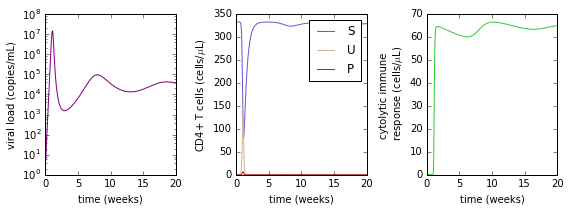

In [81]:
aS = 100;   #constant growth rate of susceptibles [cells/uL/day]
dS = 0.3;   #susceptible death rate [1/day] 
Bt = 1e-4;  #infectivity [cells/virion-day]
dI = 1;     #infected death rate [1/day]
k  = 0.04;  #immune cell killing rate [1/day]
w  = 1;     #immune cell multiplier [1/day]
aE = 1e-4;   #initial E cell concentration [cells/uL]
dE = 0.003;  #immune death rate [1/day]
E50 = 25;   #50 pct max E cell concentration [cells/uL]
tau= 0.05   #productively infected probability
p  = 5e4    #leak+burst viral production rate [virions/cell]
g  = 23      #viral clearance [1/day]
        
#initial conditions
U0=0; 
P0=0;
V0=0.03; #copies/uL
S0=aS/dS; 
E0=aE/dE;       

tt=np.linspace(0,20*7,1e3) #week timeseries

#change this part accordingly for which model one wants to simulate
sol=odeint(model_1, [S0,U0,P0,E0,V0], tt, 
           (aS,dS,Bt,tau,dI,dI,k,aE,dE,E50,w,p,g), mxstep=1000)

t=tt/7

#viral load CD4 and CD8
plt.figure(figsize=(8,3),dpi=600)
plt.subplot(131)
plt.semilogy(t,sol[:,4]*1e3,color='purple')
plt.ylabel('viral load (copies/mL)')
plt.xlabel('time (weeks)')
plt.tight_layout()
plt.subplot(132)
plt.plot(t,sol[:,0],color='slateblue')
plt.plot(t,sol[:,1],color='tan')
plt.plot(t,sol[:,2],color='firebrick')
plt.legend(['S','U','P'])
plt.ylabel('CD4+ T cells (cells/$\mu$L)')
plt.xlabel('time (weeks)')
plt.subplot(133)
plt.plot(t,sol[:,3],color='limegreen')
plt.ylabel('cytolytic immune \n response (cells/$\mu$L)')
plt.xlabel('time (weeks)')
plt.tight_layout()
